In [1]:
import numpy as np
from functools import reduce
import time

In [2]:
def normal_arccos_summation(cosines):
  return reduce(lambda a,b:a+b, [np.arccos(c) for c in cosines])

In [3]:
def idea_arccos_summation(cosines):
  return reduce(lambda a,b: a*b, [complex(c, np.sqrt(1-c**2)) for c in cosines])

In [4]:
theta = np.pi/2
divisions = [1,2,4,8,16,32,64,128]
times = 5000

In [5]:
normal_execution_time = []
for division in divisions:
  cosines = np.array( [np.cos(theta/division) for i in range(division)])

  _normal_execution_time = []
  for i in range(times):
    start_time = time.time()
    normal_execution_error = theta - normal_arccos_summation(cosines)
    end_time = time.time()
    execution_time = end_time - start_time
    _normal_execution_time.append(execution_time)
    # print("Execution time:", execution_time, "seconds,  error:", normal_execution_error)
  normal_execution_time.append(np.mean(_normal_execution_time))
  print("Average:",  normal_execution_time[-1])

Average: 5.32069206237793e-06
Average: 8.115673065185547e-06
Average: 1.6720390319824217e-05
Average: 2.469310760498047e-05
Average: 5.067286491394043e-05
Average: 0.00010375089645385742
Average: 0.00020158085823059082
Average: 0.0004169950485229492


In [6]:
idea_execution_time = []
for division in divisions:
  cosines = np.array( [np.cos(theta/division) for i in range(division)])

  _idea_execution_time = []
  for i in range(times):
    start_time = time.time()
    idea_execution_error = theta - idea_arccos_summation(cosines)
    end_time = time.time()
    execution_time = end_time - start_time
    _idea_execution_time.append(execution_time)
    # print("Execution time:", execution_time, "seconds,  error:", idea_execution_error)
  idea_execution_time.append(np.mean(_idea_execution_time))
  print("Average:", idea_execution_time[-1])

Average: 9.310817718505859e-06
Average: 1.6688442230224608e-05
Average: 3.357234001159668e-05
Average: 2.7932691574096678e-05
Average: 0.00013522658348083497
Average: 0.00017662954330444335
Average: 0.00020951709747314454
Average: 0.0003564384937286377


In [7]:
print("N=", divisions)
print(normal_execution_time)
print(idea_execution_time)

N= [1, 2, 4, 8, 16, 32, 64, 128]
[5.32069206237793e-06, 8.115673065185547e-06, 1.6720390319824217e-05, 2.469310760498047e-05, 5.067286491394043e-05, 0.00010375089645385742, 0.00020158085823059082, 0.0004169950485229492]
[9.310817718505859e-06, 1.6688442230224608e-05, 3.357234001159668e-05, 2.7932691574096678e-05, 0.00013522658348083497, 0.00017662954330444335, 0.00020951709747314454, 0.0003564384937286377]


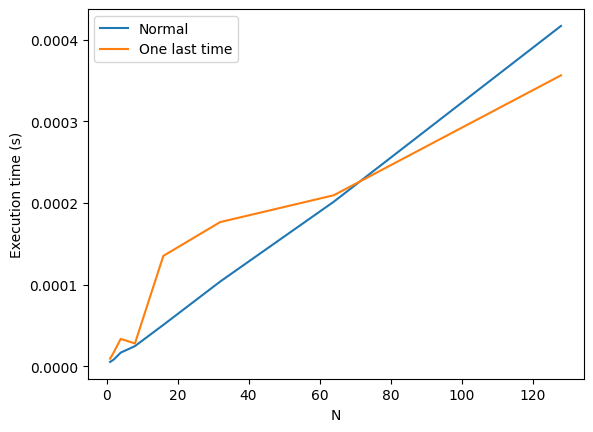

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(divisions, normal_execution_time, label='Normal')
ax.plot(divisions, idea_execution_time, label='One last time')
ax.set_xlabel('N')
ax.set_ylabel('Execution time (s)')
ax.legend()
plt.show()